<div style="background: #000;
            color: #FFF;
            margin: 0px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1 >Week 19 Class 1 02/01</h1>
</div>

## Objectives for this week:
* Data Visualizations continued

## Todays Agenda
* SQL

<div style="background: #000;
            color: #FFF;
            margin: 0px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1 >Homework Problem</h1>
</div>

### Exercise 1

Given two lists `A` and `B`, and `B` is an anagram of `A`. `B` is an anagram of `A` means `B` is made by randomizing the order of the elements in `A`.

We want to find an index mapping `P`, from `A` to `B`. A mapping `P[i] = j` means the `i`th element in `A` appears in `B` at index `j`.

These lists `A` and `B` may contain duplicates. If there are multiple answers, output any of them.

For example, given 
```
A = [12, 28, 46, 32, 50]
B = [50, 12, 32, 46, 28]
```
We should return
```
[1, 4, 3, 2, 0]
```
as `P[0] = 1` because the `0`th element of `A` appears at `B[1]`, and `P[1] = 4` because the 1st element of `A` appears at `B[4]`, and so on. 

Note:

    A, B have equal lengths in range [1, 100].
    A[i], B[i] are integers in range [0, 10^5].


In [ ]:
def ex1(A, B):
    return [B.index(i) for i in A if i in B]

try:
    assert(ex1([],[]) == [])
    assert(ex1([1],[1]) == [0])
    assert(ex1([12,28,46,32,50], [50,12,32,46,28]) == [1,4,3,2,0])
    assert(ex1([1,2,3,4,5,6,7], [4,5,6,3,2,1,7]) == [5, 4, 3, 0, 1, 2, 6])
    assert(ex1([21,12,5,34,15,46,57], [46,57,21,34,12,15,5]) == [2, 4, 6, 3, 5, 0, 1])
    print("solution is correct")
except AssertionError:
    print("solution is incorrect")

<div style="background: #000;
            color: #FFF;
            margin: 0px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1>SQL</h1>
</div>

The following is adapted from the very useful [learnxinyminutes.com](https://learnxinyminutes.com/docs/sql/) and the [SQLite3 documentation](https://sqlite.org/lang.html)

```sql
-- Comments start with two hyphens. End each command with a semicolon.

-- SQL is not case-sensitive about keywords. The sample commands here
-- follow the convention of spelling them in upper-case because it makes
-- it easier to distinguish them from database, table, and column names.

-- Create and delete a database. Database and table names are case-sensitive.
CREATE DATABASE someDatabase;
DROP DATABASE someDatabase;
-- List available databases.
SHOW DATABASES;
```


In [ ]:
import sqlite3

In [ ]:
# this will connect to the sqlite3 database: `test.db`
#conn = sqlite3.connect(':memory:')
conn = sqlite3.connect('test.db')
print("opened database successfully")

In [ ]:
def connection(db_name=None):
    conn = None
    try:
        db_name = db_name or ':memory:'
        conn = sqlite3.connect(db_name)
        return conn
    except Exception as e:
        print(e)
            
connection()

In [ ]:
from contextlib import closing

with closing(connection('test.db')) as connection:
    with closing(connection.cursor()) as cursor:
        rows = cursor.execute("SELECT 1").fetchall()
        
print(connection)

In [ ]:
rows

In [ ]:
cursor.execute('')

In [ ]:
connection()

In [ ]:
# our sql script

import sqlite3
from contextlib import closing

def connection(db_name=None):
    conn = None
    try:
        db_name = db_name or ':memory:'
        conn = sqlite3.connect(db_name)
        return conn
    except Exception as e:
        print(e)
        
def execute(db, cmd):
    with closing(connection(db)) as conn:
        with closing(conn.cursor()) as cursor:
            try:
                rows = cursor.execute(cmd).fetchall()
                return rows
            except Exception as e:
                print(e)

```sql
-- Use a particular existing database.
USE employees;
```

In [ ]:
# not necessary with sqlite3

```sql
-- List all the tables in all the databases. Implementations typically provide
-- their own shortcut command to do this with the database currently in use.
SELECT * FROM INFORMATION_SCHEMA.TABLES
WHERE TABLE_TYPE='BASE TABLE';
```

In [ ]:
rows = execute(db, "SELECT name from sqlite_master where type='table';")
print([i[0] for i in rows])

In [ ]:
# our sql script

import sqlite3
from contextlib import closing

db = "../datasets/chinook.db"

def connection(db_name=None):
    conn = None
    try:
        db_name = db_name or ':memory:'
        conn = sqlite3.connect(db_name)
        return conn
    except Exception as e:
        print(e)
        
def execute(db, cmd):
    with closing(connection(db)) as conn:
        with closing(conn.cursor()) as cursor:
            try:
                rows = cursor.execute(cmd).fetchall()
                return rows
            except Exception as e:
                print(e)
                
def get_tables(db):
    rows = execute(db, "SELECT name from sqlite_master where type='table';")
    return [i[0] for i in rows]

get_tables(db)

**How do we know what columns are there?**

In [ ]:
execute(db, "pragma table_info(employees);")

In [ ]:
# updating our sql script

import sqlite3
from contextlib import closing

db = "../datasets/chinook.db"

def connection(db_name=None):
    conn = None
    try:
        db_name = db_name or ':memory:'
        conn = sqlite3.connect(db_name)
        return conn
    except Exception as e:
        print(e)
        
def execute(db, cmd):
    with closing(connection(db)) as conn:
        with closing(conn.cursor()) as cursor:
            try:
                rows = cursor.execute(cmd).fetchall()
                return rows
            except Exception as e:
                print(e)
                
def get_tables(db):
    rows = execute(db, "SELECT name from sqlite_master where type='table';")
    return [i[0] for i in rows]

def get_cols(db, table):
    return execute(db, f"pragma table_info({table});")
    

tables = get_tables(db)
cols = {table:[i[1] for i in get_cols(db, table)] for table in tables}
#print(tables)
print(cols['customers'])

In [ ]:
db = "../datasets/chinook.db"

rows = execute(db, "SELECT * from employees")
print(rows[0])

```sql
-- Select all rows and columns from the current database's departments table.
-- Default activity is for the interpreter to scroll the results on your screen.
SELECT * FROM employees;
```

# SELECT

The SELECT statement is used to query the database. The result of a SELECT is zero or more rows of data where each row has a fixed number of columns. A SELECT statement does not make any changes to the database. 

Generating the results of a simple SELECT statement is presented as a four step process in the description below:
* FROM clause processing: The input data for the simple SELECT is determined. The input data is either implicitly a single row with 0 columns (if there is no FROM clause) or is determined by the FROM clause.
* WHERE clause processing: The input data is filtered using the WHERE clause expression.
* GROUP BY, HAVING and result-column expression processing: The set of result rows is computed by aggregating the data according to any GROUP BY clause and calculating the result-set expressions for the rows of the filtered input dataset.
* DISTINCT/ALL keyword processing: If the query is a "SELECT DISTINCT" query, duplicate rows are removed from the set of result rows. 

### Examples: 
```sql
-- Retrieve all rows from the employees table,
-- but only the FirstName and Lastname columns.
-- Splitting up commands across lines is OK.
SELECT FirstName, 
LastName FROM employees;
```

In [ ]:
execute(db, "SELECT FirstName, LastName FROM employees")

**Limiting results**

```sql
-- Retrieve all departments columns, but just 5 rows.
SELECT * FROM employees LIMIT 5;
```

In [ ]:
execute(db, "SELECT * FROM employees LIMIT 2")

**Using WHERE**
```sql
-- Retrieve all column values from the customers
-- table where the email value has the substring 'google'.
SELECT * FROM customers WHERE email LIKE '%google%';
```

In [ ]:
execute(db, "SELECT * FROM customers WHERE email LIKE '%google%';")

```sql
-- Retrieve all columns from the customers table where the country
-- column starts with an 'G' and has exactly 6 characters after it.
"SELECT * FROM customers WHERE country LIKE 'G______';"
```

In [ ]:
execute(db, "SELECT * FROM customers WHERE country LIKE 'G______';")

**Using `DISTINCT`**

```sql
-- Select BillingCountry values from the invoices table but don't show duplicates.
SELECT DISTINCT BillingCountry FROM invoices;
```

In [ ]:
execute(db, 'SELECT DISTINCT BillingCountry FROM invoices;')

```sql
-- Same as above, but sorted (case-sensitive) by the country values.
SELECT DISTINCT BillingCountry FROM invoices ORDER BY BillingCountry;
```

In [ ]:
execute(db, "SELECT DISTINCT BillingCountry FROM invoices ORDER BY BillingCountry;")

**Using `COUNT`**
```sql
-- Show the number of rows in the tracks table.
"SELECT COUNT(*) FROM tracks;"
```

In [ ]:
execute(db, "SELECT COUNT(*) FROM tracks;")

```sql
-- Show the number of rows in the invoices table that
-- have a total value of greater than 20.
SELECT COUNT(*) FROM invoices WHERE total > 20;
```

In [ ]:
get_tables(db)

In [ ]:
get_cols(db, 'invoices')

In [ ]:
execute(db, "SELECT COUNT(*) FROM invoices WHERE total > 20")

**Operators in the `WHERE` clause:**
* `=` - Equal 
* `>` - Greater than 
* `<` - Less than 
* `>=` - Greater than or equal 
* `<=` - Less than or equal 
* `<>` - Not equal. Note: In some versions of SQL this operator may be written as != 
* BETWEEN - Between a certain range 
* LIKE - Search for a pattern 
* IN - To specify multiple possible values for a column   

**Using `IN`**

With integers:
```sql
-- Select total from invoices where the billing country is Germany or the UK and sum the total
SELECT SUM(Total) FROM invoices WHERE BillingCountry in ('Germany', 'United Kingdom');
```

In [ ]:
execute(db, "SELECT SUM(Total) FROM invoices WHERE BillingCountry in ('Germany', 'United Kingdom');")

**Using `Between`**

With integers:
```sql
-- Select total from invoices where total is between 20 and 30.
SELECT Total FROM invoices WHERE Total BETWEEN 20 and 30;
```

In [ ]:
# with integers
execute(db, "SELECT Total FROM invoices WHERE Total BETWEEN 20 and 30;")

**Using dates with `BETWEEN` (and using `SUM`)
With dates: (we need to pass the correct date format)**
```sql
-- Select total from invoices where InvoiceDate is between in 2009 and sum the total.
"SELECT SUM(Total) FROM invoices WHERE InvoiceDate BETWEEN '2009-01-01 00:00:00' and '2010-01-01 00:00:00';"
```

In [ ]:
execute(db, "SELECT SUM(Total) FROM invoices WHERE InvoiceDate BETWEEN '2009-01-01 00:00:00' and '2010-01-01 00:00:00';")

**We can also use some other common functions:**

`MAX`:
```sql
-- Select the MAX total from invoices where InvoiceDate is between in 2009.
"SELECT MAX(Total) FROM invoices WHERE InvoiceDate BETWEEN '2009-01-01 00:00:00' and '2010-01-01 00:00:00';"
```

Note: we can use logical operators like `AND`, `OR` AND `NOT`

In [ ]:
execute(db, "SELECT MAX(Total) FROM invoices WHERE InvoiceDate BETWEEN '2009-01-01 00:00:00' and '2010-01-01 00:00:00';")

`MIN`:
```sql
-- Select the MIN total from invoices where InvoiceDate is between in 2009.
"SELECT MIN(Total) FROM invoices WHERE InvoiceDate BETWEEN '2009-01-01 00:00:00' and '2010-01-01 00:00:00';"
```

In [ ]:
execute(db, "SELECT MIN(Total) FROM invoices WHERE InvoiceDate BETWEEN '2009-01-01 00:00:00' and '2010-01-01 00:00:00';")

`AVG`:
```sql
-- Select the AVG total from invoices where InvoiceDate is NOT in 2009.
"SELECT AVG(Total) FROM invoices WHERE InvoiceDate BETWEEN '2009-01-01 00:00:00' and '2010-01-01 00:00:00';"
```

In [ ]:
execute(db, "SELECT AVG(Total) FROM invoices WHERE InvoiceDate NOT BETWEEN '2009-01-01 00:00:00' and '2010-01-01 00:00:00';")

# `JOIN`S

A `JOIN` clause is used to combine rows from two or more tables, based on a related column between them. 

Let's check out two particular tables:

In [ ]:
get_cols(db, 'customers')

In [ ]:
get_cols(db, 'invoices')

You should notice that both of these tables have a column in common. This is considered a ForeignKey that can be used to join the two tables together. This allows SQL to form relationships between different tables.

```sql
-- A JOIN of information from multiple tables: the customers table shows
-- customer information including FirstName and CustomerID
-- and the invoices table shows Totals and CustomerID
-- we can do an inner join that will combine (similar to union) all rows by the shared column CustomerID, select 
-- customer.FirstName and invoices.Total limiting to the
-- first 10.

SELECT customers.FirstName, invoices.Total FROM customers INNER JOIN invoices ON customers.CustomerId = invoices.CustomerId LIMIT 10
```

In [ ]:
execute(db, "SELECT customers.FirstName, invoices.Total FROM customers INNER JOIN invoices ON customers.CustomerId = invoices.CustomerId LIMIT 10")

**Types of `JOIN`S**

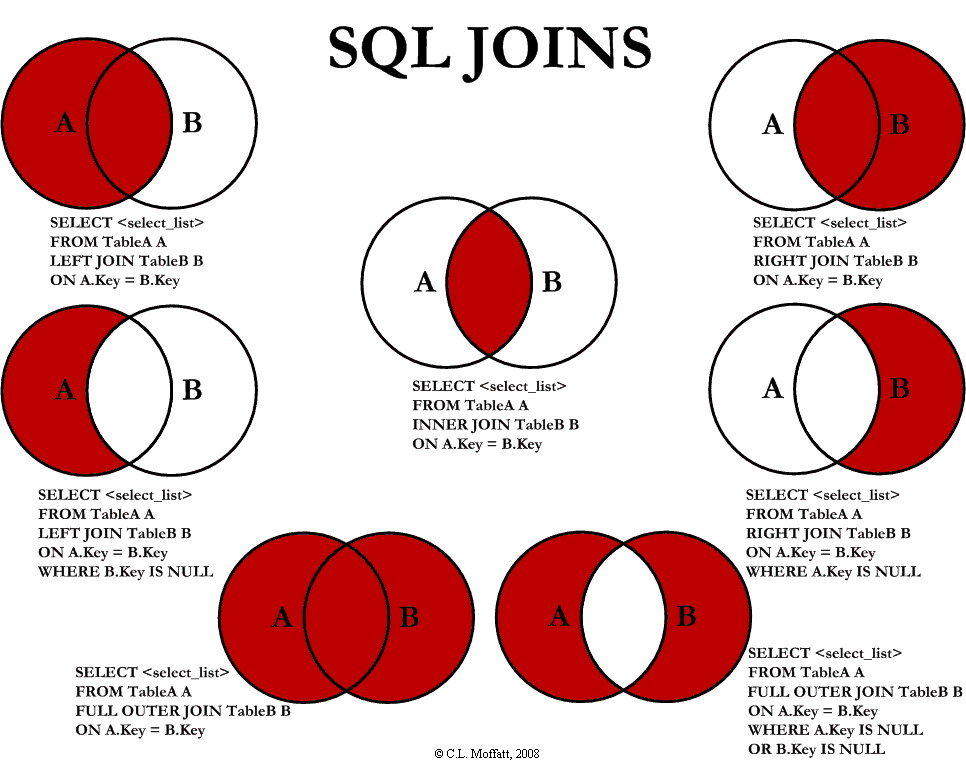

### INNER JOIN

This type of join returns those records which have matching values in both tables. So, if you perform an INNER join operation between the Customers table and the Invoices table, all the tuples which have matching values in both the tables will be given as output.

### FULL JOIN

Full Join or the Full Outer Join returns all those records which either have a match in the left(Customers) or the right(Invoices) table.

### LEFT JOIN

The LEFT JOIN or the LEFT OUTER JOIN  returns all the records from the left table and also those records which satisfy a condition from the right table. Also, for the records having no matching values in the right table, the output or the result-set will contain the NULL values.

### RIGHT JOIN

The RIGHT JOIN or the RIGHT OUTER JOIN  returns all the records from the right table and also those records which satisfy a condition from the left table. Also, for the records having no matching values in the left table, the output or the result-set will contain the NULL values.

### Natural Join

A Natural Join is also a Join operation that is used to give you an output based on the columns in both the tables between which, this join operation must be implemented. To understand the situations n which natural join is used, you need to understand the difference between Natural Join and Inner Join.

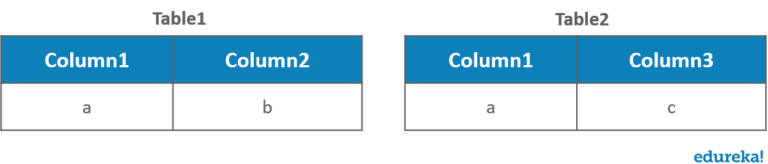

Now, if you apply INNER JOIN on these 2 tables, you will see an output as below:

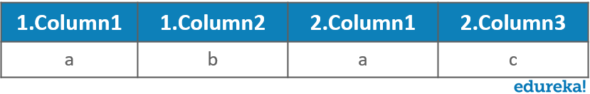

If you apply NATURAL JOIN, on the above two tables, the output will be as below:

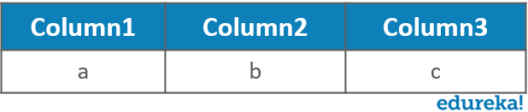

### Creating our own tables/rows

**Common SQL Data Types**

Note: Data types might have different names in different database. And even if the name is the same, the size and other details may be different! **Always check the documentation!**


Some String Types:
* CHAR(size) 	A FIXED length string (can contain letters, numbers, and special characters). The size parameter specifies the column length in characters - can be from 0 to 255. Default is 1
* VARCHAR(size) 	A VARIABLE length string (can contain letters, numbers, and special characters). The size parameter specifies the maximum column length in characters - can be from 0 to 65535
* BINARY(size) 	Equal to CHAR(), but stores binary byte strings. The size parameter specifies the column length in bytes. Default is 1
* VARBINARY(size) 	Equal to VARCHAR(), but stores binary byte strings. The size parameter specifies the maximum column length in bytes.
* TEXT(size) 	Holds a string with a maximum length of 65,535 bytes
* BLOB(size) 	For BLOBs (Binary Large OBjects). Holds up to 65,535 bytes of data

Some Numeric Types:
* BIT(size) 	A bit-value type. The number of bits per value is specified in size. The size parameter can hold a value from 1 to 64. The default value for size is 1.
* BOOL 	Zero is considered as false, nonzero values are considered as true.
* INT(size) 	A medium integer. Signed range is from -2147483648 to 2147483647. Unsigned range is from 0 to 4294967295. The size parameter specifies the maximum display width (which is 255)
* FLOAT(size, d) 	A floating point number. The total number of digits is specified in size. The number of digits after the decimal point is specified in the d parameter. This syntax is deprecated in MySQL 8.0.17, and it will be removed in future MySQL versions
* DOUBLE(size, d) 	A normal-size floating point number. The total number of digits is specified in size. The number of digits after the decimal point is specified in the d parameter

In [ ]:
# our sql script

import sqlite3
from contextlib import closing

db = 'new.db'

def connection(db_name=None):
    conn = None
    try:
        db_name = db_name or ':memory:'
        conn = sqlite3.connect(db_name)
        return conn
    except Exception as e:
        print(e)

def execute(db, cmd, commit=False):
    with closing(connection(db)) as conn:
        with closing(conn.cursor()) as cursor:
            try:
                cur = cursor.execute(cmd).fetchall()
                if commit:
                    conn.commit()
                else:
                    return cur
            except Exception as e:
                print(e)
    
                
def get_tables(db):
    rows = execute_fetch(db, "SELECT name from sqlite_master where type='table';")
    return [i[0] for i in rows]

### `CREATE`

```sql
-- Create a table called tablename1, with the two columns shown, for
-- the database currently in use. Lots of other options are available
-- for how you specify the columns, such as their datatypes.
CREATE TABLE tablename1 (fname VARCHAR(20), lname VARCHAR(20));
```

In [ ]:
db = 'new.db'

execute(db, 'CREATE TABLE tablename1 (fname VARCHAR(20) NOT NULL, lname VARCHAR(20) NOT NULL);',\
        commit=True)

In [ ]:
get_tables(db)

### `INSERT`

```sql
-- Insert a row of data into the table tablename1. This assumes that the
-- table has been defined to accept these values as appropriate for it.
INSERT INTO tablename1 VALUES('Unknown','Person');
```

In [ ]:
execute(db, "INSERT INTO tablename1 VALUES('Unknown','Person');", commit=True)

In [ ]:
execute(db, "SELECT * FROM tablename1;")

### `UPDATE`

```sql
-- In tablename1, change the fname value to 'John' and lname value
-- to 'Doe' for all rows that have an lname value of 'Person'.
UPDATE tablename1 SET fname='John' lname='Doe' WHERE lname='Person';
```

In [ ]:
execute(db, "UPDATE tablename1 SET fname='John', lname='Doe' WHERE lname='Person';", commit=True)

In [ ]:
execute(db, "SELECT * FROM tablename1;")

### `DELETE`
```sql
-- Delete rows from the tablename1 table
-- where the lname value begins with 'M'.
DELETE FROM tablename1 WHERE lname like 'D%';
```

In [ ]:
execute(db, "DELETE FROM tablename1 WHERE lname like 'D%';", \
        commit=True)

In [ ]:
execute(db, "SELECT * FROM tablename1;")

```sql
-- Delete all rows from the tablename1 table, leaving the empty table.
DELETE FROM tablename1;
```

In [ ]:
execute(db, "DELETE FROM tablename1;", commit=True)

In [ ]:
execute(db, "SELECT * FROM tablename1;")

```sql
-- Remove the entire tablename1 table.
DROP TABLE tablename1;

```

In [ ]:
execute(db, "DROP TABLE tablename1;", commit=True)

In [ ]:
execute(db, "SELECT * FROM tablename1;")

### Restarting With Primary key

We need to change our `CREATE` command:

```sql
-- Create a table called tablename1, with the two columns shown, for
-- the database currently in use. Lots of other options are available
-- for how you specify the columns, such as their datatypes.
CREATE TABLE tablename1 (
    id INTEGER PRIMARY KEY,
    fname VARCHAR(20), 
    lname VARCHAR(20)
);

```